Necessary imports made ⬇️

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn import svm
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn import datasets, linear_model, model_selection
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme(font_scale=2,palette='colorblind')

In [2]:
possum_df = pd.read_csv('possum.csv')

In [3]:
possum_df.head(1)

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0


We can reshape and clean this data to improve clarity for our analyses.

## Preparing our dataset

In [4]:
new_columns = {'Pop': 'population','hdlngth' : 'head_length', 'skullw' : 'skull_width', 'totlngth' : 'total_length', 'taill' : 'tail_length', 'footlgth' : 'foot_length', 'earconch' : 'ear_conch_length', 'eye' : 'interpupillary_distance', 'chest' : 'chest_girth', 'belly' : 'belly_girth'}

In [5]:
possum_df = possum_df.rename(columns=new_columns)

In [6]:
possum_df.head(1)

,case,site,population,sex,age,head_length,skull_width,total_length,tail_length,foot_length,ear_conch_length,interpupillary_distance,chest_girth,belly_girth
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0


We can also change some categorical values to improve clarity.

These column names are much more descriptive and less likely to confuse users.

In [7]:
population_dict = {'Vic': 'Victoria','other': 'New South Wales or Queensland'}
sex_dict = {'m' : 'male', 'f' : 'female'}

In [8]:
possum_df['population'] = possum_df['population'].replace(population_dict)

In [9]:
possum_df['sex'] = possum_df['sex'].replace(sex_dict)

In [10]:
possum_df.sample(5)

,case,site,population,sex,age,head_length,skull_width,total_length,tail_length,foot_length,ear_conch_length,interpupillary_distance,chest_girth,belly_girth
52,53,3,New South Wales or Queensland,female,3.0,93.1,58.1,91.0,38.0,67.4,46.0,16.5,26.0,33.5
43,44,2,Victoria,male,NaN,85.1,51.5,76.0,35.5,70.3,52.6,14.4,23.0,27.0
75,76,6,New South Wales or Queensland,male,5.0,92.4,56.8,89.0,41.0,64.5,46.4,17.8,26.0,33.0
19,20,1,Victoria,female,4.0,94.8,56.3,89.0,38.0,73.8,52.4,15.5,27.0,36.0
96,97,7,New South Wales or Queensland,male,3.0,91.0,53.1,86.0,38.0,63.8,46.0,14.5,25.0,31.5


We can handle missing values in two ways...

First, we can replace missing values with estimated values.

Lambda function to fill missing values with the mean of the respective column values.

In [11]:
replace_missing = lambda col: col.fillna(col.mean())

In [12]:
possum_df['head_length'] = replace_missing(possum_df['head_length'])
possum_df['skull_width'] = replace_missing(possum_df['skull_width'])
possum_df['total_length'] = replace_missing(possum_df['total_length'])
possum_df['tail_length'] = replace_missing(possum_df['tail_length'])
possum_df['foot_length'] = replace_missing(possum_df['foot_length'])
possum_df['ear_conch_length'] = replace_missing(possum_df['ear_conch_length'])
possum_df['interpupillary_distance'] = replace_missing(possum_df['interpupillary_distance'])
possum_df['chest_girth'] = replace_missing(possum_df['chest_girth'])
possum_df['belly_girth'] = replace_missing(possum_df['belly_girth'])

In [13]:
possum_df.shape

(104, 14)

Secondly, we can remove rows with remaining missing values.

In [14]:
possum_df = possum_df.dropna()

In [15]:
possum_df.shape

(102, 14)

Two rows with missing values were removed

## Linear regression

In [16]:
target_var = 'age'
categorical_vars = ['population', 'sex']

This categorical data is not appropriate for linear regression. The target variable / variable to predict and the features should be continuous / numerical. For prediction purposes, we must drop the target variable.

In [17]:
possum_X = possum_df.drop(categorical_vars, axis=1)
possum_X = possum_X.drop(target_var, axis=1)

In [18]:
possum_y = possum_df[target_var]

In [19]:
possum_y.shape, possum_X.shape

((102,), (102, 11))

In [20]:
possum_X_train, possum_X_test, possum_y_train, possum_y_test = train_test_split(possum_X, possum_y)

In [21]:
regr = linear_model.LinearRegression()

We will use linear regression to predict the ages of the possum based on their features. Regression is used in the real world to predict weather, prices, and more.

Linear regression takes input and attempts to find a line with the best fit to predict outputs.

In [22]:
regr.fit(possum_X_train, possum_y_train)

LinearRegression()

In [23]:
possum_y_pred = regr.predict(possum_X_test)

In [24]:
possum_y_test.describe()

count    26.000000
mean      3.346154
std       1.671940
min       1.000000
25%       2.000000
50%       3.000000
75%       5.000000
max       6.000000
Name: age, dtype: float64

In [25]:
avg_age = possum_y_test.mean()
age_var = possum_y_test.var()
avg_age, age_var

(3.3461538461538463, 2.7953846153846156)

(Average age, age variance)

In [26]:
mean_squared_error(possum_y_test, possum_y_pred)

3.2168143754675356

We can see that our mean squared error is high for such a small range of age/target values.

In [27]:
regr.score(possum_X_test,possum_y_test)

-0.19678949797251177

This weak regression score value indicates that this is likely a bad fit.

Our mean squared error and negative r2 score is not ideal so we can try optimizing our linear regression model.

A parameter grid is established to be used by GridSearchCV

In [28]:
param_grid = {
    'fit_intercept' : [True, False],
    'copy_X' : [True, False],
    'n_jobs' : [0, 1, 2, 4, 8],
    'positive' : [True, False]
}

Parameters can greatly impact model performance (time, score, computational complexity) which is why GridSearchCV is used to identify the combination that is best for our model's performance.

In [29]:
regr_opt = model_selection.GridSearchCV(regr,param_grid,cv=10)

In [30]:
regr_opt.fit(possum_X_train, possum_y_train)

GridSearchCV(cv=10, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [0, 1, 2, 4, 8], 'positive': [True, False]})

New optimized model is created

Model is fit with X and y training data (default parameters used to split into random train and test subsets).

In [31]:
possum_y_pred = regr_opt.predict(possum_X_test)

In [32]:
possum_y_test.describe()

count    26.000000
mean      3.346154
std       1.671940
min       1.000000
25%       2.000000
50%       3.000000
75%       5.000000
max       6.000000
Name: age, dtype: float64

In [33]:
mean_squared_error(possum_y_test, possum_y_pred)

2.9722969167763442

Our regression loss is less than that of the unoptimized model.

In [34]:
regr.score(possum_X_test,possum_y_test), regr_opt.score(possum_X_test,possum_y_test)

(-0.19678949797251177, -0.10581877586175503)

Unoptimized model score, optimized model score

We can see how the optimized model scored slightly higher in this case.

Instead of this multivariate linear regression, we could try univariate (1 feature) linear regression to see if a single feature such as foot length is better at predicting a possum's age.

In [35]:
possum_X = possum_df['foot_length'].values[:,np.newaxis]

In [36]:
possum_X_train, possum_X_test, possum_y_train, possum_y_test = train_test_split(possum_X, possum_y)

We will fit our optimized model with our new possum_X data

In [37]:
regr_opt.fit(possum_X_train, possum_y_train)

GridSearchCV(cv=10, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [0, 1, 2, 4, 8], 'positive': [True, False]})

In [38]:
possum_y_pred = regr_opt.predict(possum_X_test)

In [39]:
mean_squared_error(possum_y_test, possum_y_pred)

2.7984349274690667

In [40]:
regr_opt.score(possum_X_test,possum_y_test)

-0.3828523471996266

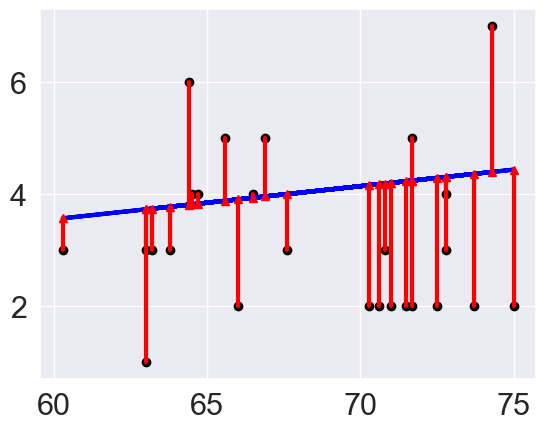

In [41]:
# plot line prediction
plt.plot(possum_X_test, possum_y_pred, color='blue', linewidth=3);

# draw vertical lines from each data point to its predict value
[plt.plot([x,x],[yp,yt], color='red', linewidth=3, markevery=[0], marker ='^')
                 for x, yp, yt in zip(possum_X_test, possum_y_pred, possum_y_test)];

# plot these last so they are visually on top
plt.scatter(possum_X_test, possum_y_test,  color='black');

Our line produced by our linear regression model is visualized and used to predict possum age in this case.

Univariate linear regression seemed to produce slightly worse results, meaning foot length is not a great sole indicator of possum age. 

We can try getting even better results by experimenting with multivariate regression, unviariate regression, and other optimized linear regression models.

# DecisionTreeRegressor

In [56]:
dt = DecisionTreeRegressor()

In [57]:
param_grid = {
    'max_depth': [2,3,4,5,6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': list(range(2,20,2)),
    'min_weight_fraction_leaf': [0, 0.2, 0.4]
}

In [58]:
dt_opt = model_selection.GridSearchCV(dt,param_grid,cv=10)

In [59]:
dt_opt.fit(possum_X_train, possum_y_train)

dt_df = pd.DataFrame(dt_opt.cv_results_)

In [60]:
dt_df.head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_min_weight_fraction_leaf,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001198,0.000402,0.0007,0.000398,2,2,2,0,"{'max_depth': 2, 'min_samples_leaf': 2, 'min_s...",-0.167149,...,-0.04812,-0.031905,-0.591624,-0.031399,-0.004653,-0.398072,-0.606867,-0.446752,0.745158,365


# Support Vector Regression(SVR)

In [61]:
svr_clf = svm.SVR()
param_grid = {'kernel':['linear','rbf'], 'C':[.5, .75,1,2,5,7, 10]}
svr_opt = model_selection.GridSearchCV(svr_clf,param_grid,cv=10)

# optmize the svm put the CV results in a dataframe
svr_opt.fit(possum_X_train, possum_y_train)
sv_df = pd.DataFrame(svr_opt.cv_results_)

In [62]:
sv_df.head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001841,0.000442,0.000654,0.000453,0.5,linear,"{'C': 0.5, 'kernel': 'linear'}",-0.398831,-0.98171,-0.063906,-0.187387,-0.055209,-0.40789,-0.190694,-0.038811,-0.201651,-0.140253,-0.266634,0.268087,7


## Comparison

Now we'll compare the DecisionTreeRegressor with Support Vector Regression(SVR)

In [73]:
dt_df['mean_test_score'].describe()

count    405.000000
mean      -0.302006
std        0.142688
min       -0.915974
25%       -0.353050
50%       -0.308896
75%       -0.153591
max       -0.153591
Name: mean_test_score, dtype: float64

In [74]:
sv_df['mean_test_score'].describe()

count    14.000000
mean     -0.317978
std       0.067275
min      -0.457382
25%      -0.343689
50%      -0.287848
75%      -0.266384
max      -0.264756
Name: mean_test_score, dtype: float64

In [75]:
dt_opt.score(possum_X_test,possum_y_test), svr_opt.score(possum_X_test,possum_y_test)

(-0.4693029919440539, -0.15431216369436007)

In this case, the DecisionTreeRegressor model produced a worse score than the SVR.

We can further compare the two models to evaluate potential tradeoffs

In [76]:
dt_df['mean_fit_time'].describe()

count    405.000000
mean       0.000960
std        0.000223
min        0.000100
25%        0.000805
50%        0.000958
75%        0.001087
max        0.002003
Name: mean_fit_time, dtype: float64

In [77]:
sv_df['mean_fit_time'].describe()

count    14.000000
mean      0.001844
std       0.000497
min       0.001348
25%       0.001530
50%       0.001763
75%       0.002093
max       0.003133
Name: mean_fit_time, dtype: float64

In [78]:
dt_df['mean_score_time'].describe()

count    405.000000
mean       0.000905
std        0.000198
min        0.000353
25%        0.000796
50%        0.000902
75%        0.001025
max        0.001557
Name: mean_score_time, dtype: float64

In [79]:
sv_df['mean_score_time'].describe()

count    14.000000
mean      0.000886
std       0.000267
min       0.000341
25%       0.000728
50%       0.000954
75%       0.001051
max       0.001297
Name: mean_score_time, dtype: float64

In this case, the DecisionTreeRegressor is faster to fit but slightly slower to score.

Based on the fit time results, we can see just how much more computationally expensive support vector regression is than decision tree regression. When larger datasets are used for training, the computational expense will grow exponentially.

Fit and score times should definitely be considered when choosing models for tasks that are especially demanding.

Context is key.

The type of relationship between the feature (foot length) and the target variable (age) may vary from model to model.

Based on these results, for similar real world tasks, I would recommend the SVR because it was better at predicting the possum's age. If the task was much more demanding however, I may recommend the DecisionTreeRegressor model as it is less computationally expensive and more interpretable.